<a href="https://colab.research.google.com/github/chatmethar-comp/CondoRegressionModel/blob/main/linearCondoRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
x = np.array([35,47,42,44,45,45,50,42,43,44,40,41,37,39,32,36])
y = np.array([2911,4000,3822,3900,3894,4102,4264,3714,3954,4000,3789,3900,2985,3951,1920,3544])
x = x.reshape(-1,1)

import pandas as pd
xdataframe = pd.DataFrame(x)
ydataframe = pd.DataFrame(y)
xdataframe.insert(1,"cost",ydataframe)
print(xdataframe)

     0  cost
0   35  2911
1   47  4000
2   42  3822
3   44  3900
4   45  3894
5   45  4102
6   50  4264
7   42  3714
8   43  3954
9   44  4000
10  40  3789
11  41  3900
12  37  2985
13  39  3951
14  32  1920
15  36  3544


### **Linear Regression Condominiam**

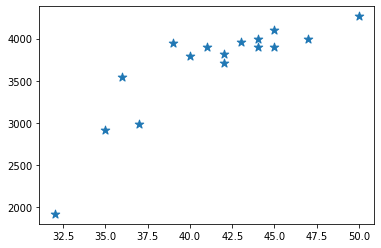

In [37]:
import matplotlib.pyplot as plt
plt.scatter(x,y, s=80, marker = '*')
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
LR = LinearRegression(normalize=True)
LR.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [40]:
y_pred = LR.predict(x)
print(y_pred)
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y,y_pred))
print("rmse root mean sqare error =",rmse)

r2 = r2_score(y,y_pred)
print("R2 = ",r2)

[2989.19213483 4262.47752809 3731.94194757 3944.15617978 4050.26329588
 4050.26329588 4580.7988764  3731.94194757 3838.04906367 3944.15617978
 3519.72771536 3625.83483146 3201.40636704 3413.62059925 2670.87078652
 3095.29925094]
rmse root mean sqare error = 303.9152760843936
R2 =  0.7177248113014503


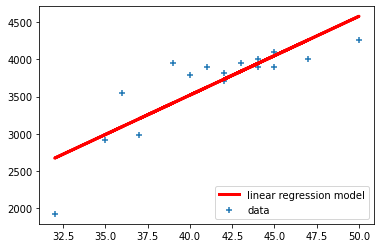

In [41]:
plt.scatter(x,y,marker= '+',label = 'data')
plt.plot(x,y_pred,linewidth=3,color = 'r',label = 'linear regression model')
plt.legend(loc = 'lower right')
plt.show()

In [42]:
data_predict = [63]
print("63 m2 area cost",LR.predict([data_predict])[0],"thousand bath","\nposibility {:.2f}%".format(r2_score(y,y_pred)*100))

63 m2 area cost 5960.191385767791 thousand bath 
posibility 71.77%


## **Polynomial Regression Condominiam**

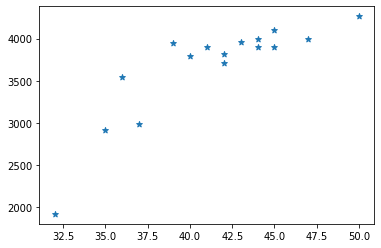

In [43]:
plt.scatter(x,y,marker='*')
plt.show()

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [45]:
poly_feature = PolynomialFeatures(degree=2)
x_poly = poly_feature.fit_transform(x)
print(x_poly)

[[1.000e+00 3.500e+01 1.225e+03]
 [1.000e+00 4.700e+01 2.209e+03]
 [1.000e+00 4.200e+01 1.764e+03]
 [1.000e+00 4.400e+01 1.936e+03]
 [1.000e+00 4.500e+01 2.025e+03]
 [1.000e+00 4.500e+01 2.025e+03]
 [1.000e+00 5.000e+01 2.500e+03]
 [1.000e+00 4.200e+01 1.764e+03]
 [1.000e+00 4.300e+01 1.849e+03]
 [1.000e+00 4.400e+01 1.936e+03]
 [1.000e+00 4.000e+01 1.600e+03]
 [1.000e+00 4.100e+01 1.681e+03]
 [1.000e+00 3.700e+01 1.369e+03]
 [1.000e+00 3.900e+01 1.521e+03]
 [1.000e+00 3.200e+01 1.024e+03]
 [1.000e+00 3.600e+01 1.296e+03]]


In [46]:
y_pred_poly = poly_model.predict(x_poly)
print("rmse:",np.sqrt(mean_squared_error(y,y_pred_poly)))
print("r2:",r2_score(y,y_pred_poly))

rmse: 207.72313115860635
r2: 0.8681326232114241


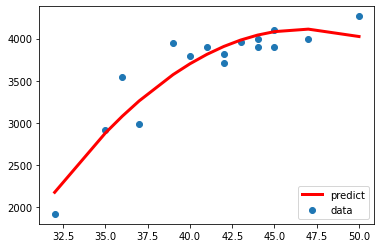

In [47]:
poly_model = LinearRegression()
poly_model = poly_model.fit(x_poly,y)
plt.scatter(x,y,label='data')

sorted_zip = sorted(zip(x,y_pred_poly))
x_plot, y_plot = zip(*sorted_zip)
plt.plot(x_plot,y_plot,label='predict',linewidth=3,color='r')
plt.legend(loc = 'lower right')
plt.show()

## **Boston data**

In [48]:
from sklearn import datasets
boston = datasets.load_boston()

In [49]:
x = boston.data
y = boston.target
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [51]:
LRboston = LinearRegression(normalize=True)

In [52]:
LRboston.fit(X_train,y_train)
y_predboston = LRboston.predict(X_test)
print(y_predboston)

[19.87004804 23.66418004 30.19269179 25.57476764 12.62816829 30.44833434
 21.05979473 23.78466171 17.90237549 18.00701343 16.85839074 34.84590736
 20.92532604 19.75510509 31.96276619 21.47959966 18.5550246  22.94770801
 18.76222128 23.69181123 36.38909445 10.5095288  26.0669355  37.88335566
 13.72196275 17.98885206 22.32789041 16.81876316 26.98574846 32.26073347
 30.57054791 34.81037555 28.53835494 17.7523245  33.39918972 19.32625091
 24.95179978 13.88994554 18.48566553 19.75306947 20.31000116 20.02151018
 14.15630986 10.06146622 22.75258839 32.53185165 24.25096571 23.96370163
 28.93447915 31.20808748 23.87589212 32.30509026 24.21932219 16.5947099
 20.99868703 29.92391048  6.99904562 23.56641121 34.88317342 29.82209799
 13.15713247  4.45057936 19.4994048  27.60526245 19.52679414 32.15612588
 32.74545457 17.01584039 20.12707096 21.10780161 27.7396811  18.63219568
 38.12953669 21.99115004 20.44937563 35.00664095 28.23244928 17.50115705
 20.14977606 23.39015377 25.26685739 21.61940411 20.

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = np.sqrt(mean_squared_error(y_predboston,y_test))
print(rmse )
print(r2_score(y_predboston,y_test))

5.2325077797179365
0.47760878249629546
